In [141]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Mechanics Lab IIb -- Projectile Motion with Air Resistance

This lab builds upon the numerical integration code your wrote in the previous lab. This time, though, you will include drag into your calculations of projectile motion.

*** If you have not yet completed Lab IIa, please do so now.***

## Objectives
In this lab, you will 

* include linear and quadratic drag into your equations of motion for a projectile;
* validate your code by comparing your numerical solution to the analytic solution is several special cases;
* and calculate the mechanical energy loss due to drag.

## Improved Euler Numerical Integration

#### Exercise 2.11

Start by copying your code from the previous lab to solve projectile motion without air resistance using the improved Euler method into the cell below. Make sure that it still produces reasonable results.

33.0
[ 20.    0.   20.   -9.8]


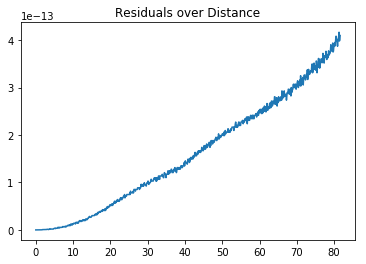

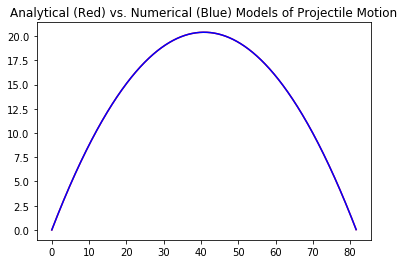

In [142]:
# No damping, numerical integration 
def kinematics(pos0,vel0,a,t) :
    return 0.5*a*t**2 + vel0*t + pos0


print(kinematics(1,2,3,4))






# No damping, numerical integration, projectile motion over level ground: defining variables.

# Here we define the variables that will be used throughout the integration
g = 9.8 #the acceleration due to gravity.  By declaring it here it will be available anywhere in the rest of the notebook
m = 1 # the mass of the projectile

# Create 
tstart = 0 #starting time
tend = 15 #ending time
N = 3000 # #steps
h = (tend-tstart)/N #  h is the time step, deltat
tpts = arange(tstart,tend,h) # an array of evenly spaced time points at which to create solutions

# Initialize x and v.  For a complete solution to the differential equations we need to specify the starting
#values of x, vx, y and vy
x0 = 0 #initial x position
y0 = 0 #initial y position
vx0 = 20 #initial x-component of the velocity
vy0 = 20 #initial y-component of the velocity
rinit = array([x0,vx0,y0,vy0],float) #this array contains the initial values of x, vx, y, vy, in order
# Note that the list 0,20,0,20 is enclosed in square brackets


def deriv(r,t):
    x = r[0]  #first, extract the variables from the r-list
    vx = r[1]
    y = r[2]
    vy = r[3]
    dxdt = vx #now create the derivatives.  Note:  by definition dxdt = vx
    dvxdt = 0
    dydt = vy
    dvydt = - g
    return array([dxdt, dvxdt, dydt, dvydt],float) #we need to specify the output of this function


print(deriv(rinit,0))





ansol = []
xpts = []  #this is an empty list that will hold x solutions
vxpts = []  #this will hold vx solutions
ypts = []  #y
vypts = [] #vy
dify = []
r = rinit.copy()  #make a *copy* of rinit.  This leaves rinit unchanged, but allows r to take on different values

#The engine:  initialize values, then step through with simple Euler method (uses a 1st-order Taylor series)
for t in tpts :  #this *for* loop sequentially takes on all the elements of tpts, first to last
    xpts.append(r[0])  #extend the list by tacking the latest x on to the end of it
    vxpts.append(r[1]) #starting from r which is originally a copy of rinit
    ypts.append(r[2])
    vypts.append(r[3])

    ansol.append(kinematics(0, 20, -9.8, t))
    dify.append(r[2]-kinematics(0, 20, -9.8, t))
    h = 1/200
    k1= (h/2)*deriv(r,t)
    r += h*deriv(r+k1,t)
    
    if (t > 0.0)&(r[2]<=0.0):  # a test to see when to cut off the solution
                               # (the & symbol indicates a logical AND:  both conditions need to be true)
        tmax = t               # by noting when the projectile hits the ground
      
        range = r[0]           #store the last x position in the variable named range
        break  #quit out of the loop
        
    

#print(ansol)
#print(dify)
plt.figure(1)
plt.plot(xpts,dify)
plt.title("Residuals over Distance")

plt.figure(2)
plt.plot(xpts,ansol, 'r-')
plt.plot(xpts,ypts, 'b-')
title("Analytical (Red) vs. Numerical (Blue) Models of Projectile Motion")

## Projectile Motion with Drag

In order to include drag force, you will need to adjust your deriv function to include velocity-dependent damping coefficients of the form:
    
$ \vec{F}_{drag} = -b \vec{v} - c v^2 \hat{v}$

## Linear Drag

#### Exercise 2.11

You will start with the simpler and analytically-solvable case of just linear drag (i.e., c = 0). Redo your Improved Euler projectile problem with the same initial conditions as before to show the trajectory and find the range (over level ground) for b = 0.05, and c = 0.0.  Assume that the projectile has mass m = 0.5 kg.

##### Drag-restricted range (for b =  0.05, c = 0.0, m = 0.5 kg) = 

*I get approximately 64 m.  Show your result to 4 significant figures.*

How is the range and height of the projectile affected by the inclusion of linear drag? Explain ***here***. 

Range = 63.7737123837


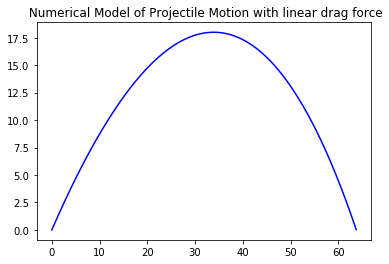

In [143]:
def deriv(r,t):
    x = r[0]  #first, extract the variables from the r-list
    vx = r[1]
    y = r[2]
    vy = r[3]
    m=0.5 #mass
    b=0.05 #linear drag force coefficient
    c=0 #quadratic drag force coeeficient
    dxdt = vx #now create the derivatives.  Note:  by definition dxdt = vx
    dvxdt = -b*vx/m - c*(vx**2+vy**2)*vx/(m*(vx**2 + vy**2)**0.5)  #acceleration due to drag force 
    dydt = vy
    dvydt = - g -(b*vy/m) - c*(vx**2+vy**2)*vy/(m*(vx**2 + vy**2)**0.5)  #acceleration due to drag force and gravity
    return array([dxdt, dvxdt, dydt, dvydt],float) #we need to specify the output of this function


ansol = []
xpts = []  #this is an empty list that will hold x solutions
vxpts = []  #this will hold vx solutions
ypts = []  #y
vypts = [] #vy
dify = []
r = rinit.copy()  #make a *copy* of rinit.  This leaves rinit unchanged, but allows r to take on different values

#The engine:  initialize values, then step through with simple Euler method (uses a 1st-order Taylor series)
for t in tpts :  #this *for* loop sequentially takes on all the elements of tpts, first to last
    xpts.append(r[0])  #extend the list by tacking the latest x on to the end of it
    vxpts.append(r[1]) #starting from r which is originally a copy of rinit
    ypts.append(r[2])
    vypts.append(r[3])

    ansol.append(kinematics(0, 20, -9.8, t))
    dify.append(r[2]-kinematics(0, 20, -9.8, t))
    h = 1/200
    k1= (h/2)*deriv(r,t)
    r += h*deriv(r+k1,t)
    
    if (t > 0.0)&(r[2]<=0.0):  # a test to see when to cut off the solution
                               # (the & symbol indicates a logical AND:  both conditions need to be true)
        tmax = t               # by noting when the projectile hits the ground
      
        range = r[0]           #store the last x position in the variable named range
        break  #quit out of the loop
        
    


plt.figure(2)
plt.plot(xpts,ypts, 'b-')
title(" Numerical Model of Projectile Motion with linear drag force")
print("Range =",range)

## Quadratic Drag

### One-dimensional motion

#### Exercise 2.12

Now modify your deriv function to include quadratic but not linear drag. Let b = 0 and c = 0.002; keep m = 0.5 kg. Since it is only possible to find an analytic solution with quadratic drag for 1-dimensional motion (why is that?), start by using the following initial conditions (equivalent to a rock dropped vertically from a cliff): position(t = 0s) = (0m, 400m) and velocity(t = 0s) = (0m/s, 0m/s). Since the motion will be in one dimension, plot y vs. t rather than vs. x.

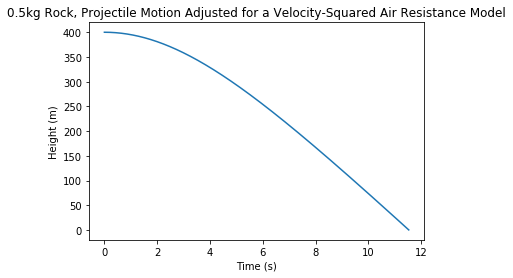

In [144]:
x0 = 0.0 #initial x position
y0 = 400.0 #initial y position
vx0 = 0.0 #initial x-component of the velocity
vy0 = 0.0 #initial y-component of the velocity
rinit = array([x0,vx0,y0,vy0],float)
m=0.5 #mass
b=0.0  #new linear drag force coefficient
c=0.002 #new quadratic drag force coeeficient

def deriv(r,t):
    x = r[0]  #first, extract the variables from the r-list
    vx = r[1]
    y = r[2]
    vy = r[3]
    dxdt = vx #now create the derivatives.  Note:  by definition dxdt = vx
    dvxdt = -b*vx/m - c*((vx**2+vy**2)**0.5)*vx/m 
    dydt = vy
    dvydt = - g -(b*vy/m) - c*((vx**2+vy**2)**0.5)*vy/m
    return array([dxdt, dvxdt, dydt, dvydt],float) #we need to specify the output of this function


ansol = []
xpts = []  #this is an empty list that will hold x solutions
vxpts = []  #this will hold vx solutions
ypts = []  #y
vypts = [] #vy
dify = []
tpts = []
t=0
r = rinit.copy()  #make a *copy* of rinit.  This leaves rinit unchanged, but allows r to take on different values

#The engine:  initialize values, then step through with simple Euler method (uses a 1st-order Taylor series)
while r[2] >= 0 :  #this *for* loop sequentially takes on all the elements of tpts, first to last
    xpts.append(r[0])  #extend the list by tacking the latest x on to the end of it
    vxpts.append(r[1]) #starting from r which is originally a copy of rinit
    ypts.append(r[2])
    vypts.append(r[3])
    t=t+1/200 #increment the time by h=1/200 s 
    tpts.append(t)
    h = 1/200
    k1= (h/2)*deriv(r,t)
    r += h*deriv(r+k1,t)
    
    if (t > 0.0)&(r[2]<=0.0):  # a test to see when to cut off the solution
                               # (the & symbol indicates a logical AND:  both conditions need to be true)
                               # by noting when the projectile hits the ground
      
        range = r[0]           #store the last x position in the variable named range
        break  #quit out of the loop
        
    
plt.figure(1)
plt.plot(tpts,ypts)
plt.title("0.5kg Rock, Projectile Motion Adjusted for a Velocity-Squared Air Resistance Model")
xlabel("Time (s)")
ylabel("Height (m)")




#### Exercise 2.13

What terminal velocity would you expect the rock to reach?

-49.5m/s (See attached calculation.)

##### Expected termnal velocity:

Plot y-velocity vs. time and estimate the terminal velocity. Are your answers consistent with each other? Explain ***here***. 

The final velocity calculated at end-time is -48.4782177227 meters/second


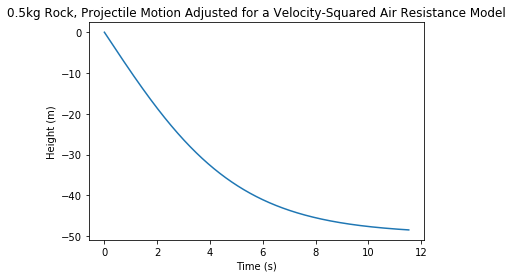

In [145]:
# <Exercise 2.13 v vs. t for projectile motion with quadratic drag, using improved Euler.>

plt.figure(1)
plt.plot(tpts,vypts)
plt.title("0.5kg Rock, Projectile Motion Adjusted for a Velocity-Squared Air Resistance Model")
xlabel("Time (s)")
ylabel("Height (m)")

print("The final velocity calculated at end-time is", r[3], "meters/second")


Next, you will test your quadratic-drag code with two different sets of initial conditions. When you do this, try to determine the minimum amount of code you will need to copy into a new cell. For instance, since your deriv function will not be changing, there is no need to copy it.

#### Exercise 2.14

Calculate and plot y vs. t and vy vs. t for the initial conditions: position(t = 0s) = (0m, 0m) and velocity(t = 0s) = (0m/s, 28m/s), and find how long the rock remains in the air. Keep all other parameters the same as in exercises 2.13 -- 2.15. This is the situation where the rock is thrown vertically up into the air.

##### Time in air (for b =  0, c = 0.002, m = 0.5 kg) = 

*I get approximately 5 s.  Show your result to 3 significant figures.*

So, the time in air is 5.32 seconds


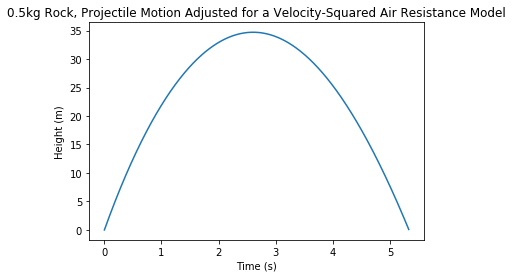

In [146]:
# <Exercise 2.14, projectile motion with quadratic drag, using improved Euler.>
KE=[] #list of Kinetic energies at time points
PE=[] #list of potential energies at time points
E = KE+PE #list of total energies at time points
littleWorks = [] #list of work done by drag force during each time increment

#spaced time points at which to create solutions
x0 = 0.0 #initial x position
y0 = 0.0 #initial y position
vx0 = 0.0 #initial x-component of the velocity
vy0 = 28.0 #initial y-component of the velocity
rinit = array([x0,vx0,y0,vy0],float) #this array contains the initial values of x, vx, y, vy, in order

xpts = []  #this is an empty list that will hold x solutions
vxpts = []  #this will hold vx solutions
ypts = []  #y
vypts = [] #vy
dify = []
tpts = []
t=0
r = rinit.copy()  #make a *copy* of rinit.  This leaves rinit unchanged, but allows r to take on different values
#counter=0
#The engine:  initialize values, then step through with simple Euler method (uses a 1st-order Taylor series)
while r[2] >= 0 :  #this *for* loop sequentially takes on all the elements of tpts, first to last
    xpts.append(r[0])  #extend the list by tacking the latest x on to the end of it
    vxpts.append(r[1]) #starting from r which is originally a copy of rinit
    ypts.append(r[2])
    vypts.append(r[3])
    KE.append(0.5*m*((r[1]**2)+(r[3]**2)))
    PE.append(m*g*r[2])
    E.append(KE[-1]+PE[-1])
    littleWorks.append(-1*c*(r[1]**2+r[3]**2)*((r[1]**2+r[3]**2)**0.5/200)) #work=force * distance
    t=t+1/200
    tpts.append(t)
    h = 1/200
    k1= (h/2)*deriv(r,t)
    r += h*deriv(r+k1,t)
    
    if (t > 0.0)&(r[2]<=0.0):  # a test to see when to cut off the solution
                               # (the & symbol indicates a logical AND:  both conditions need to be true)
                               # by noting when the projectile hits the ground
      
        range = r[0]           #store the last x position in the variable named range
        break  #quit out of the loop
        
plt.figure(1)
plt.plot(tpts,ypts)
plt.title("0.5kg Rock, Projectile Motion Adjusted for a Velocity-Squared Air Resistance Model")
xlabel("Time (s)")
ylabel("Height (m)")

print("So, the time in air is", round(tpts[-1],2), "seconds")


#### Exercise 2.15

Drag forces are nonconservative forces so work done by them results in a loss of the mechanical energy of the system. To see this, first find the amount of mechanical energy lost during the rock's trajectory and then graph the kinetic energy, potential energy and total energy vs. time (all on one plot).

##### Mechanical energy loss = 

*I get approximately 48 J.  Show your result to 3 significant figures.*

Notice that at one point in the trajectory, the rate of energy loss goes to zero. Explain ***here*** why that makes sense.

47.4161958422 Joules of energy are lost.


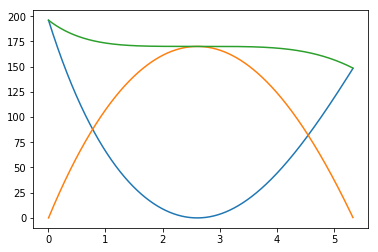

In [147]:
# <Exercise 2.15, mechanical energy loss.>

plot(tpts,KE)
plot(tpts,PE)
plot(tpts,E)
print(E[0]-E[-1], "Joules of energy are lost.")






#### Exercise 2.16

Since work done on a system is equal to the change in energy, it is possible to equate the change in mechanical energy of the rock to the work done by the drag force. For this exercise, estimate the work done by the drag force across each time-step and sum to find the total work done. Essentially, you will be finding

$$
W = \int \vec F \cdot d\vec r
$$

using the rectangle method for estimating an integral. Verify that the total work you calculate is close to the change in energy.

*Hint 1:* The function cumsum() will calculate the sum over an array. This is cleaner and easier than writing a loop to sum over the elements, as you did in the previous lab. https://docs.scipy.org/doc/numpy/reference/generated/numpy.cumsum.html

*Hint 2:* You'll need to find the displacement across each time-step. One way to do this is to subtract y[0:-2] from y[1:-1]. Can you see why? Remember that referencing element -1, refers to the last element in the array.

*Hint 3:* Be aware of the negative/positive signs of your displacement.

In [148]:
# <Exercise 2.16, work done by drag force.>
print(cumsum(littleWorks)[-1], "Joules of Work are done on the Baseball")


-47.5982107958 Joules of Work are done on the Baseball


## Linear and Quadratic Drag

Now for 2-dimensional motion with both linear and quadratic drag. *This is a trajectory that cannot be found analytically and so must be calculated numercially!* 

#### Exercise 2.17

Looking at Exercise 2.1 in Taylor (p. 45), match the coefficients for a baseball of diameter 7 cm, and mass m = 145 g and again plot the trajectory and find the range. In order to see clearly the effect of the drag, include the analytic solution for the case of zero-drag on your plot of the trajectory.

*Coding style tip:* rather than hard-coding your values for the drag-coefficients into your deriv function, try passing them as variables. This will make your deriv function more flexible.

##### Drag-restricted range for the baseball = 

*I get approximately 55 m.  Show your result to 4 significant figures.*

So, the time in air is 3.62 seconds
The range is 54.6043041189 meters :)


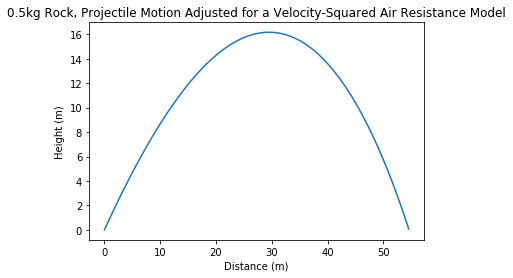

In [149]:
# <Exercise 2.17 Solution for baseball from Taylor, p. 45. Projectile motion, improved Euler, with drag.>
bet=1.6*10**(-4)#N*s/m^2
gam=0.25 #N*s^2/m^4
D=0.07 #m diameter of ball
b=bet*D
#b=0
c=gam*D**2
#c=0
m=0.145 #g mass of ball
# <Exercise 2.14, projectile motion with quadratic drag, using improved Euler.>
KE=[]
PE=[]
E = KE+PE
littleWorks = []

x0 = 0.0 #initial x position
y0 = 0.0 #initial y position
vx0 = 20.0 #initial x-component of the velocity
vy0 = 20.0 #initial y-component of the velocity
rinit = array([x0,vx0,y0,vy0],float) #this array contains the initial values of x, vx, y, vy, in order
# Note that the list 0,20,0,20 is enclosed in square brackets=

xpts = []  #this is an empty list that will hold x solutions
vxpts = []  #this will hold vx solutions
ypts = []  #y
vypts = [] #vy
dify = []
tpts = []
t=0
r = rinit.copy()  #make a *copy* of rinit.  This leaves rinit unchanged, but allows r to take on different values
#The engine:  initialize values, then step through with simple Euler method (uses a 1st-order Taylor series)
while r[2] >= 0 :  #this *for* loop sequentially takes on all the elements of tpts, first to last
    xpts.append(r[0])  #extend the list by tacking the latest x on to the end of it
    vxpts.append(r[1]) #starting from r which is originally a copy of rinit
    ypts.append(r[2])
    vypts.append(r[3])
    KE.append(0.5*m*((r[1]**2)+(r[3]**2)))
    PE.append(m*g*r[2])
    E.append(KE[-1]+PE[-1])
    littleWorks.append(-1*(c*(r[1]**2+r[3]**2)+b*((r[1]**2+r[3]**2)**0.5))*(((r[1]**2+r[3]**2)**0.5/200)))
    t=t+1/200
    tpts.append(t)
    #ansol.append(kinematics(0, 0, 0, t))
    #dify.append(r[2]-kinematics(0, 0, 0, t))
    h = 1/200
    k1= (h/2)*deriv(r,t)
    r += h*deriv(r+k1,t)
    
    if (t > 0.0)&(r[2]<=0.0):  # a test to see when to cut off the solution
                               # (the & symbol indicates a logical AND:  both conditions need to be true)
                               # by noting when the projectile hits the ground
      
        range = r[0]           #store the last x position in the variable named range
        break  #quit out of the loop
        
    

#print(ansol)
#print(dify)
plt.figure(1)
plt.plot(xpts,ypts)
plt.title("0.5kg Rock, Projectile Motion Adjusted for a Velocity-Squared Air Resistance Model")
xlabel("Distance (m)")
ylabel("Height (m)")
print("So, the time in air is", round(tpts[-1],2), "seconds")
print("The range is", range, "meters :)")

#### Exercise 2.18

Try alternately setting both $b$ and $c$ to zero. ***Which has a greater effect on the trajectory of the baseball: the linear or quadratic term?***

See attatched for explanantion

## Check-out
#### Exercise 2.19

Briefly summarize in the cell below the ideas of today's lab.

Today we added drag forces to our model of projectile motion we made in Lab 2a. We found the change in mechanical energy using the same loop for our numerical solution, and we also did rectangular summation to calculate the work done on the projectile. We had issues with making for loops for exercises 2.16 and 2.15. To solve this issue, we changed our code to print the result we wanted, and integrated our loop into the code we have been working on for our projectile model.

## Challenge Problems

Repeat the work-energy analysis you did in 2.15 and 2.16 for the baseball. Note that you'll have to calculate the change in position in for 2-dimensional motion and that you'll have to include both forms of drag. 

-29.4161231816
-29.3227383482


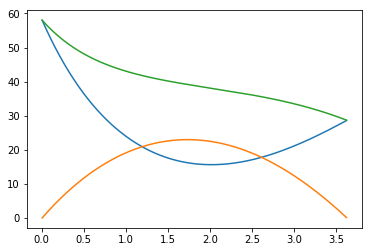

In [150]:
print(cumsum(littleWorks)[-1])
plot(tpts,KE)
plot(tpts,PE)
plot(tpts,E)
print(E[-1]-E[0])